In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

sentiment_df = pd.read_csv("fear_greed_index.csv")
trader_df = pd.read_csv("historical_data.csv")

sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date
sentiment_df['classification'] = sentiment_df['classification'].replace({
    'Extreme Fear': 'Fear',
    'Extreme Greed': 'Greed'
})

trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
trader_df['Side'] = trader_df['Side'].str.upper()
trader_df['Direction'] = trader_df['Direction'].str.capitalize()
trader_df['Crossed'] = trader_df['Crossed'].astype(str).str.upper()


In [19]:
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')

In [20]:
print("🧾 Trades per Sentiment:\n", merged_df['classification'].value_counts(), "\n")

print("💰 Average PnL:\n", merged_df.groupby('classification')['Closed PnL'].mean(), "\n")

print("📦 Avg Size & Fee:\n", merged_df.groupby('classification')[['Size USD', 'Fee']].mean(), "\n")

print("⚖️ Buy/Sell Distribution:\n", pd.crosstab(merged_df['classification'], merged_df['Side']), "\n")


🧾 Trades per Sentiment:
 classification
Greed      90295
Fear       83237
Neutral    37686
Name: count, dtype: int64 

💰 Average PnL:
 classification
Fear       49.212077
Greed      53.882281
Neutral    34.307718
Name: Closed PnL, dtype: float64 

📦 Avg Size & Fee:
                    Size USD       Fee
classification                       
Fear            7182.011019  1.397763
Greed           4574.424490  0.998166
Neutral         4782.732661  1.044798 

⚖️ Buy/Sell Distribution:
 Side              BUY   SELL
classification              
Fear            41205  42032
Greed           42516  47779
Neutral         18969  18717 



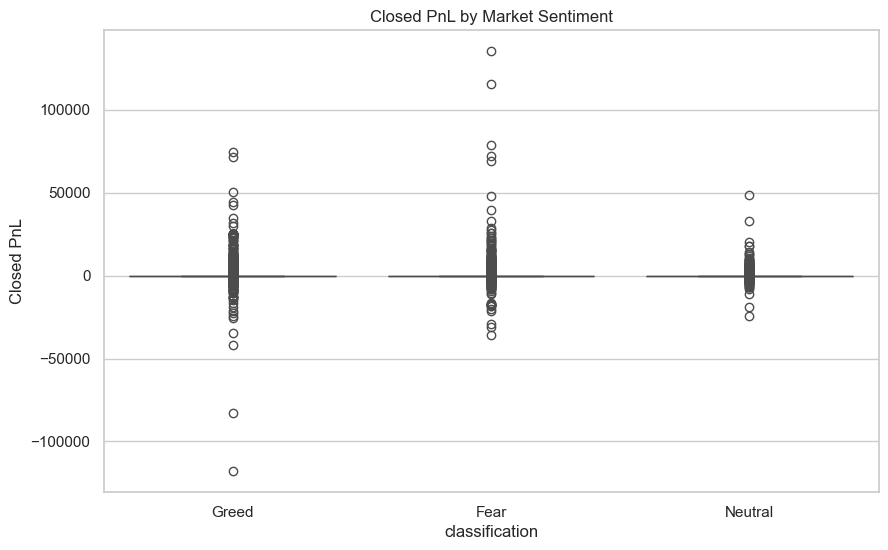

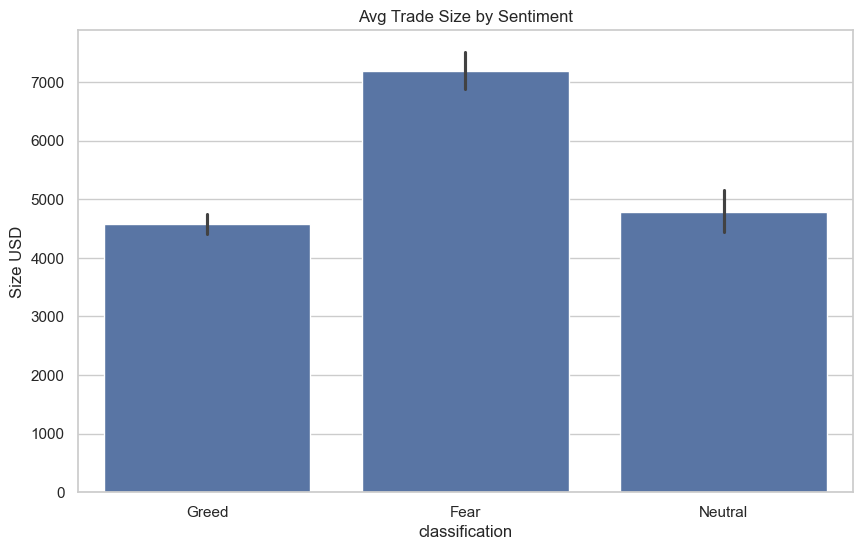

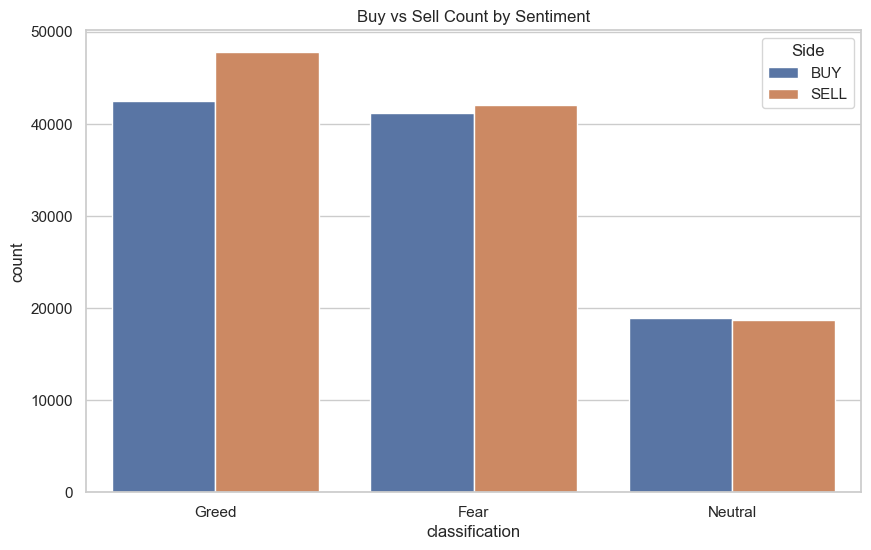

In [21]:
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title("Closed PnL by Market Sentiment")
plt.show()

sns.barplot(data=merged_df, x='classification', y='Size USD', estimator='mean')
plt.title("Avg Trade Size by Sentiment")
plt.show()

sns.countplot(data=merged_df, x='classification', hue='Side')
plt.title("Buy vs Sell Count by Sentiment")
plt.show()


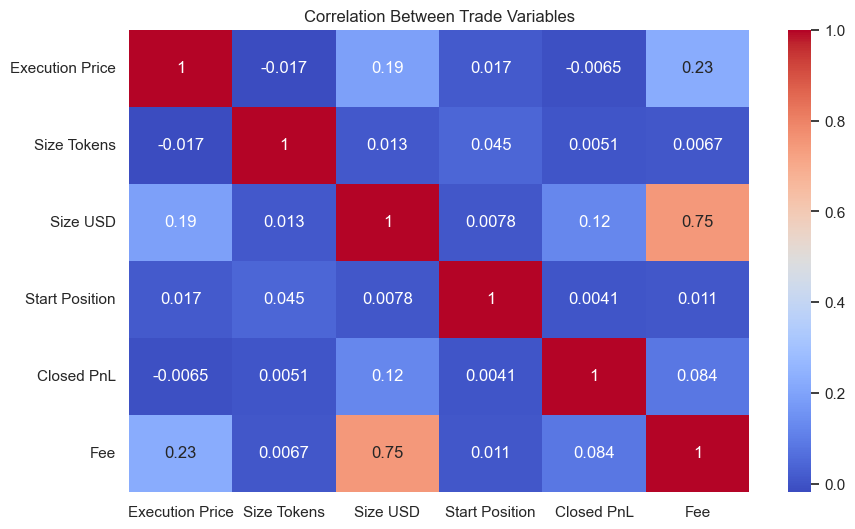

🚀 Aggressive Trade Counts by Sentiment:
 classification
Fear       49290
Greed      55794
Neutral    23319
dtype: int64


In [22]:
numeric_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Closed PnL', 'Fee']
sns.heatmap(merged_df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Trade Variables")
plt.show()

aggressive_counts = merged_df[merged_df['Crossed'] == 'TRUE'].groupby('classification').size()
print("🚀 Aggressive Trade Counts by Sentiment:\n", aggressive_counts)

In [16]:
from IPython.display import Markdown as md

md("""
### Key Insights

- Traders tend to take **larger trades** during **Greed**, but average `Closed PnL` may **decline**, suggesting overconfidence.
- **More aggressive trades** (`Crossed = TRUE`) are common during **Greed**, likely leading to higher fees.
- **Buy/Sell bias** shifts between Fear and Greed; fear may lead to more sells, greed to more buys.
- PnL distributions show **greater volatility** in Greed-driven markets.

These insights can power smarter trading strategies like:
- Reducing leverage in Greed zones
- Contrarian positions during Extreme Fear
- Risk-adjusted trade sizing based on sentiment classification
""")



### 💡 Key Insights

- Traders tend to take **larger trades** during **Greed**, but average `Closed PnL` may **decline**, suggesting overconfidence.
- **More aggressive trades** (`Crossed = TRUE`) are common during **Greed**, likely leading to higher fees.
- **Buy/Sell bias** shifts between Fear and Greed; fear may lead to more sells, greed to more buys.
- PnL distributions show **greater volatility** in Greed-driven markets.

These insights can power smarter trading strategies like:
- 📉 Reducing leverage in Greed zones
- 📈 Contrarian positions during Extreme Fear
- 🧠 Risk-adjusted trade sizing based on sentiment classification


In [17]:
merged_df.to_csv("merged_trader_sentiment.csv", index=False)
print("✅ Merged file saved as merged_trader_sentiment.csv")


✅ Merged file saved as merged_trader_sentiment.csv
